In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.metrics import confusion_matrix

In [34]:
df = pd.read_csv('diabetes.csv')

In [35]:
# profile = ProfileReport(df)
# profile

In [36]:
# Dividir los datos en un 80% para entrenamiento y 20% para pruebas

from sklearn.model_selection import train_test_split
X_entreno, X_prueba = train_test_split(df, test_size=0.2, random_state=0)

predictor = TabularPredictor(label="Outcome", 
                             problem_type = 'binary', 
                             eval_metric = 'accuracy').fit(train_data = X_entreno, time_limit = 200, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20221004_234054\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=6, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20221004_234054\"
AutoGluon Version:  0.5.2
Python Version:     3.9.5
Operating System:   Windows
Train Data Rows:    614
Train Data Columns: 8
Label Column: Outcome
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5544.02 MB
	Train Data (Original)  Memory Usage: 0.04 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Stage 2 Generators:
		Fittin

In [37]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.786645       0.507091  66.128329                0.001500           0.371564            2       True         14
1    NeuralNetFastAI_BAG_L1   0.775244       0.360559  20.800522                0.360559          20.800522            1       True         10
2           CatBoost_BAG_L1   0.771987       0.029512  13.497857                0.029512          13.497857            1       True          7
3         LightGBMXT_BAG_L1   0.762215       0.036006   9.819831                0.036006           9.819831            1       True          3
4           LightGBM_BAG_L1   0.758958       0.035002  10.068534                0.035002          10.068534            1       True          4
5      LightGBMLarge_BAG_L1   0.758958       0.044512  11.570022                

C:\Users\Oscar Paredez\AppData\Roaming\Python\Python39\site-packages\autogluon\core\utils\plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.7003257328990228,
  'KNeighborsDist_BAG_L1': 0.6970684039087948,
  'LightGBMXT_BAG_L1': 0.762214983713355,
  'LightGBM_BAG_L1': 0.758957654723127,
  'Ran

In [38]:
predictor.leaderboard()

                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.786645       0.507091  66.128329                0.001500           0.371564            2       True         14
1    NeuralNetFastAI_BAG_L1   0.775244       0.360559  20.800522                0.360559          20.800522            1       True         10
2           CatBoost_BAG_L1   0.771987       0.029512  13.497857                0.029512          13.497857            1       True          7
3         LightGBMXT_BAG_L1   0.762215       0.036006   9.819831                0.036006           9.819831            1       True          3
4           LightGBM_BAG_L1   0.758958       0.035002  10.068534                0.035002          10.068534            1       True          4
5      LightGBMLarge_BAG_L1   0.758958       0.044512  11.570022                0.044512          11.570022            1       True         13

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.786645,0.507091,66.128329,0.001500,0.371564,2,True,14
1,NeuralNetFastAI_BAG_L1,0.775244,0.360559,20.800522,0.360559,20.800522,1,True,10
2,CatBoost_BAG_L1,0.771987,0.029512,13.497857,0.029512,13.497857,1,True,7
3,LightGBMXT_BAG_L1,0.762215,0.036006,9.819831,0.036006,9.819831,1,True,3
4,LightGBM_BAG_L1,0.758958,0.035002,10.068534,0.035002,10.068534,1,True,4
5,LightGBMLarge_BAG_L1,0.758958,0.044512,11.570022,0.044512,11.570022,1,True,13
6,XGBoost_BAG_L1,0.758958,0.149024,7.684992,0.149024,7.684992,1,True,11
7,NeuralNetTorch_BAG_L1,0.757329,0.306550,21.643205,0.306550,21.643205,1,True,12
8,RandomForestEntr_BAG_L1,0.755700,0.080513,0.414073,0.080513,0.414073,1,True,6
9,RandomForestGini_BAG_L1,0.749186,0.074013,0.351488,0.074013,0.351488,1,True,5


                      model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L2   0.786645       0.507091  66.128329                0.001500           0.371564            2       True         14
1    NeuralNetFastAI_BAG_L1   0.775244       0.360559  20.800522                0.360559          20.800522            1       True         10
2           CatBoost_BAG_L1   0.771987       0.029512  13.497857                0.029512          13.497857            1       True          7
3         LightGBMXT_BAG_L1   0.762215       0.036006   9.819831                0.036006           9.819831            1       True          3
4           LightGBM_BAG_L1   0.758958       0.035002  10.068534                0.035002          10.068534            1       True          4
5      LightGBMLarge_BAG_L1   0.758958       0.044512  11.570022                0.044512          11.570022            1       True         13

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'WeightedEnsemble_L2'),
  Text(1, 0, 'NeuralNetFastAI_BAG_L1'),
  Text(2, 0, 'CatBoost_BAG_L1'),
  Text(3, 0, 'LightGBMXT_BAG_L1'),
  Text(4, 0, 'LightGBM_BAG_L1'),
  Text(5, 0, 'LightGBMLarge_BAG_L1'),
  Text(6, 0, 'XGBoost_BAG_L1'),
  Text(7, 0, 'NeuralNetTorch_BAG_L1'),
  Text(8, 0, 'RandomForestEntr_BAG_L1'),
  Text(9, 0, 'RandomForestGini_BAG_L1'),
  Text(10, 0, 'ExtraTreesEntr_BAG_L1'),
  Text(11, 0, 'ExtraTreesGini_BAG_L1'),
  Text(12, 0, 'KNeighborsUnif_BAG_L1'),
  Text(13, 0, 'KNeighborsDist_BAG_L1')])

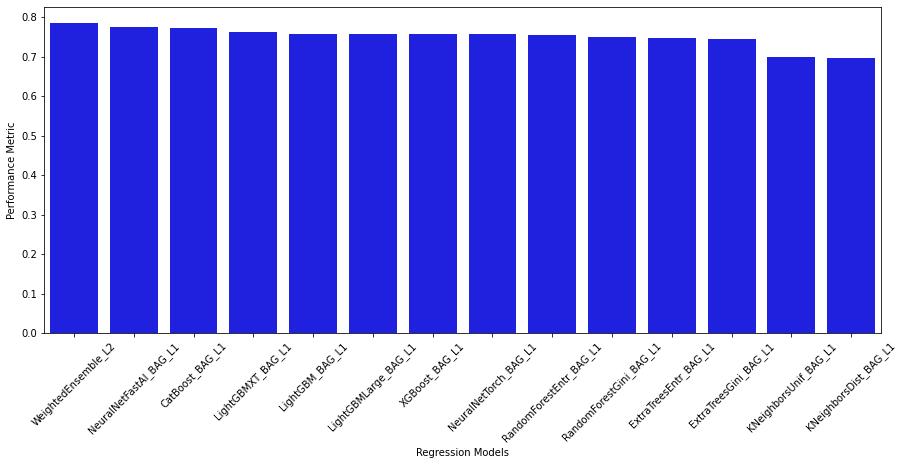

In [39]:
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric", xlabel = "Regression Models")
plt.xticks(rotation = 45)

In [40]:
predictor.evaluate(X_prueba)

Evaluation: accuracy on test data: 0.8181818181818182
Evaluations on test data:
{
    "accuracy": 0.8181818181818182,
    "balanced_accuracy": 0.7677470670113342,
    "mcc": 0.5579103079381648,
    "roc_auc": 0.8679657983694572,
    "f1": 0.6818181818181819,
    "precision": 0.7317073170731707,
    "recall": 0.6382978723404256
}


{'accuracy': 0.8181818181818182,
 'balanced_accuracy': 0.7677470670113342,
 'mcc': 0.5579103079381648,
 'roc_auc': 0.8679657983694572,
 'f1': 0.6818181818181819,
 'precision': 0.7317073170731707,
 'recall': 0.6382978723404256}

In [41]:
y_pred = predictor.predict(X_prueba)
print("Predictions:  ", list(y_pred)[:5])

Predictions:   [1, 0, 0, 1, 0]


In [42]:
y_prueba = X_prueba['Outcome']
y_prueba # valores correctos

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

Text(0.5, 0, 'Valores reales')

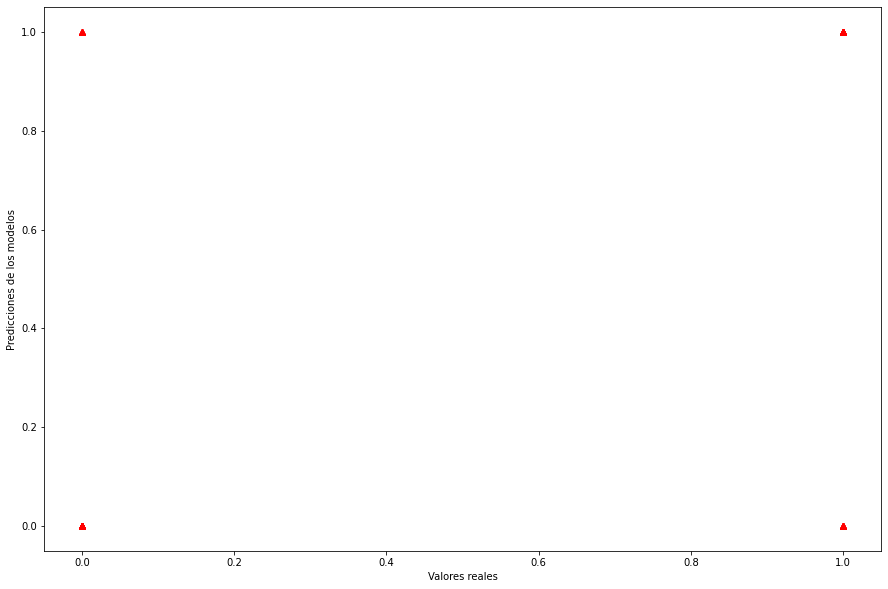

In [43]:
y_predicc = predictor.predict(X_prueba)
plt.figure(figsize = (15, 10))
plt.plot(y_prueba, y_predicc, "^", color = 'r')
plt.ylabel('Predicciones de los modelos')
plt.xlabel('Valores reales')

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import numpy as np

RMSE = float(format(np.sqrt(mean_squared_error(y_prueba, y_predicc)),'.3f'))
MSE = mean_squared_error(y_prueba, y_predicc)
MAE = mean_absolute_error(y_prueba, y_predicc)
r2 = r2_score(y_prueba, y_predicc)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2)

RMSE = 0.426 
MSE = 0.18181818181818182 
MAE = 0.18181818181818182 
R2 = 0.14257307615828196


In [47]:
print(confusion_matrix(y_prueba, y_predicc))

[[96 11]
 [17 30]]
